**DenseNet169**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 as cv

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

print('Imported Successfully')

Imported Successfully


In [ ]:
train_path = "/content/drive/MyDrive/Project_pneumonia_detection/chest_xray/train/"
val_path = "/content/drive/MyDrive/Project_pneumonia_detection/chest_xray/val/"
test_path = "/content/drive/MyDrive/Project_pneumonia_detection/chest_xray/test/"

In [ ]:
train_datagen = ImageDataGenerator(
                                
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.6,1.2),
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    
    train_path,
    target_size=(200,200),
    class_mode="binary",
    batch_size=16,
    shuffle=True,
    seed=44,
)

test_generator = test_datagen.flow_from_directory(
    
    test_path,
    target_size=(200,200),
    class_mode="binary",
    batch_size=16,
    
)

val_generator = test_datagen.flow_from_directory(
    
    val_path,
    target_size=(200,200),
    class_mode="binary",
    batch_size=8,
    
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
base_model = DenseNet169(
    
    include_top=False,
    weights="imagenet",
    input_shape=(200, 200, 3),
)

for layer in base_model.layers:
    layer.trainable = False
    

model = Sequential([
    
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid"),
])

model.summary()

51888128/51877672 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 6, 6, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1664)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               213120    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 12,856,129
Trainable params: 213,249
Non-trainable params: 12,642,880
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

es = EarlyStopping(monitor='accuracy', patience=4)
mc = ModelCheckpoint("./", monitor="accuracy", save_best_only=True)
rl = ReduceLROnPlateau(monitor="accuracy", factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(
    
    train_generator, 
    validation_data=val_generator, 
    steps_per_epoch = 100, 
    epochs=20, 
    callbacks=[es,mc,rl],
)

Epoch 1/20
100/100 [==============================] - 670s 7s/step - loss: 0.3760 - accuracy: 0.8313 - val_loss: 0.2665 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: ./assets
Epoch 2/20
100/100 [==============================] - 485s 5s/step - loss: 0.2624 - accuracy: 0.8944 - val_loss: 0.2407 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: ./assets
Epoch 3/20
100/100 [==============================] - 367s 4s/step - loss: 0.2224 - accuracy: 0.9125 - val_loss: 0.2624 - val_accuracy: 0.9375
INFO:tensorflow:Assets written to: ./assets
Epoch 4/20
100/100 [==============================] - 273s 3s/step - loss: 0.2111 - accuracy: 0.9106 - val_loss: 0.1974 - val_accuracy: 0.9375
Epoch 5/20
100/100 [==============================] - 260s 3s/step - loss: 0.1774 - accuracy: 0.9269 - val_loss: 0.2084 - val_accuracy: 0.9375
INFO:tensorflow:Assets written to: ./assets
Epoch 6/20
100/100 [==============================] - 247s 2s/step - loss: 0.2017 - accuracy: 0.9094 - val_lo

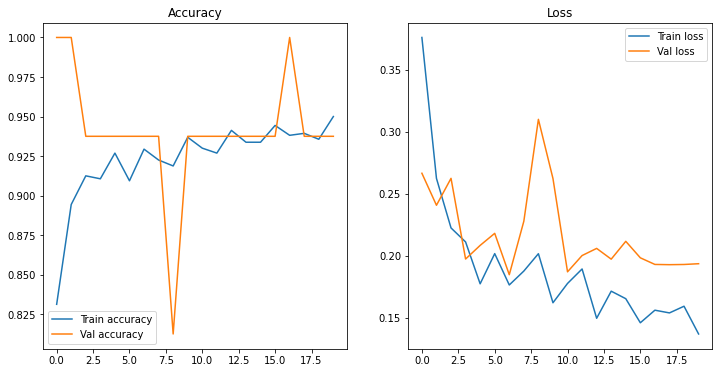

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Val accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.title("Loss")
plt.legend();

In [ ]:
model.evaluate(test_generator)

39/39 [==============================] - 217s 6s/step - loss: 0.2705 - accuracy: 0.8942


[0.2704949378967285, 0.8942307829856873]